<font size = 5><b>Loan Characteristics and Borrower APR</b></font><br><br>
<font size = 4><b>By Brett Gardner</b></font>

In this analysis, I analyzed the Prosper Loan Data set. This dataset had 113,937 rows and 81 columns. I created an additional column to average the lower and upper credit score to get  the average credit score. The main variables analyzed are The main characterics are BorrowerAPR, ProsperScore, and Credit Score.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
loan_df = pd.read_csv('prosperLoanData.csv')

<font size = 4><b>Univariate: Borrower APR</b></font>

The lowest APR is 0.653% and the highest is 51.229%. The distribution almost looks normal, but there are a few large counts at 35.797% 35.643% 37.453%. 

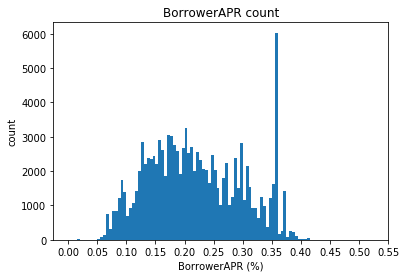

In [3]:
bins = np.arange(0, loan_df['BorrowerAPR'].max(), 0.005)
plt.hist(data = loan_df, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, loan_df['BorrowerAPR'].max()+0.05, 0.05));

<font size = 4><b>Bivariate: Borrower APR vs. ProsperScore</b></font>

The ProsperScore is "A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.". One would expect that the higher rating would lead to a lower APR and vice versa. This is what we observe below. 

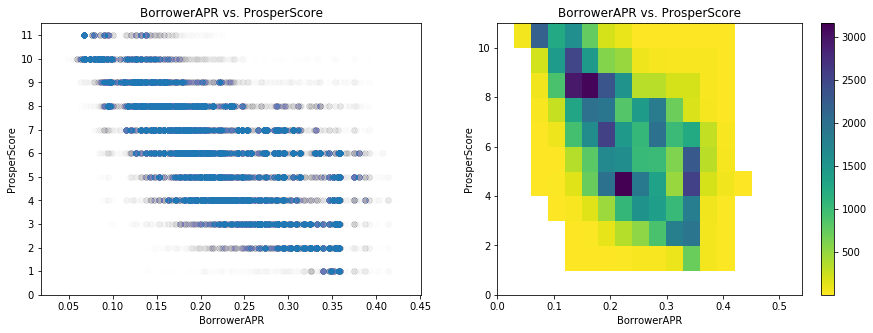

In [4]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = loan_df, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, loan_df['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, loan_df['ProsperScore'].max()+1, 1)
plt.hist2d(data = loan_df, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

<font size = 4><b>Multivariate: Borrower APR, ProsperScore by rating</b></font>

The visuals shows the lowest rated of borrowers have the highest APR percentage, and borrowers with high rating (AA) has the lowers APR percentage. This visualization differentiate groups of people in terms of APR received.

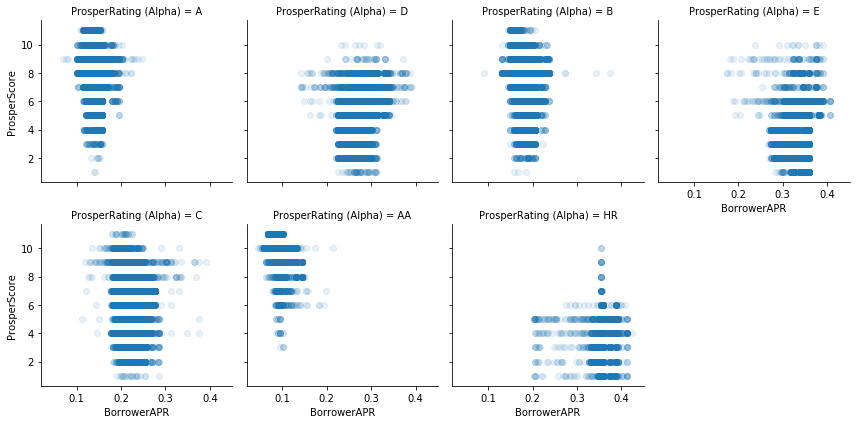

In [5]:
g = sb.FacetGrid(data = loan_df, col = 'ProsperRating (Alpha)', col_wrap = 4, size = 3)
g.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('ProsperScore')
plt.show()

In [6]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'LoanProsper_SlideDeck.ipynb'])

0